# Essentials of Machine Learning Algorithms

This notebook is used to showed basic machine learning algorithms.
<br>Summary over each algorithm get from [here](https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/)


In [1]:
# Auto-generated table of content
from jyquickhelper import add_notebook_menu
add_notebook_menu(last_level=3)

## Machine Learning Algorithm Types
### 1. Supervised Learning

This algorithm consist of a **target/outcome** variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Using these set of variables, **we generate a function that map inputs to desired outputs**. The training process continues until the model achieves a desired level of accuracy on the training data. Examples of Supervised Learning: Regression, Decision Tree, Random Forest, KNN, Logistic Regression etc.

### 2. Unsupervised Learning
In this algorithm, we **do not have any target/outcome** variable to predict/estimate.  It is used for clustering population in different groups, which is widely used for segmenting customers in different groups for specific intervention. Examples of Unsupervised Learning: Apriori algorithm, K-means.

### 3. Reinforcement Learning
Using this algorithm, the machine is trained to make specific decisions. It works this way: the **machine is exposed to an environment where it trains itself continually using trial and error**. This machine learns from past experience and tries to capture the best possible knowledge to make accurate business decisions. Example of Reinforcement Learning: Markov Decision Process

## Common Machine Learning Algorithms
Here is the list of commonly used machine learning algorithms. These algorithms can be applied to almost any data problem:

1. Linear Regression
2. Logistic Regression
3. Decision Tree
4. SVM
5. Naive Bayes
6. kNN
7. K-Means
8. Random Forest
9. Dimensionality Reduction Algorithms
10. Gradient Boosting algorithms<br>
    a. GBM<br>
    b. XGBoost<br>
    c. LightGBM<br>
    d. CatBoost<br>

Below are algorithm descriptions with code


In [2]:
import numpy as np   # math library
import pandas as pd  # dataframe library 

In [3]:
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

## 1. Linear Regression
It is used to estimate real values (cost of houses, number of calls, total sales etc.) based on continuous variable(s). Here, we **establish relationship** between **independent** and **dependent variables** by **fitting a best line**. This best fit line is known as regression line and represented by a linear equation

$$Y= a\cdot X + b\tag{1.1}$$

*The best way to understand linear regression is to relive this experience of childhood. Let us say, you ask a child in fifth grade to arrange people in his class by increasing order of weight, without asking them their weights! What do you think the child will do? He/she would likely look (visually analyze) at the height and build of people and arrange them using a combination of these visible parameters. This is linear regression in real life! The child has actually figured out that height and build would be correlated to the weight by a relationship, which looks like the equation above.*

In equation (1.1):

- $Y$ – Dependent Variable
- $a$ – Slope/Coefficient
- $X$ – Independent variable
- $b$ – Intercept/Bias

These coefficients $a$ and $b$ are derived based on **minimizing the sum of squared difference of distance** between data points $Y$ and regression line $\hat{Y}$:

$$\sum(\hat{Y}-Y)^2\tag{1.2}$$

Look at the below example. Here we have identified the best fit line having linear equation $y=0.2811x+13.9$. Now using this equation, we can find the weight, knowing the height of a person.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Linear_Regression.png)

Linear Regression is of mainly two types: **Simple** Linear Regression and **Multiple** Linear Regression. Simple Linear Regression is characterized by **one independent** variable. And, Multiple Linear Regression(as the name suggests) is characterized by **multiple** (more than 1) **independent** variables. While finding best fit line, you can fit a polynomial or curvilinear regression. And these are known as polynomial or curvilinear regression.

### 1.1 Simple Linear Regression

In [4]:
# Import Library
# Import other necessary libraries like pandas, numpy...
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
# Load Train and Test datasets
# We do it by generation

# independent variable
X = np.arange(-5, 10, 0.05)

# true value
Y = 2*X + 3

# noise
np.random.seed(42)
Z = np.random.normal(size=len(X))

# add noise to true value
Y_true = Y + Z

# reshape for model
X = X.reshape(-1, 1)
Y_true = Y_true.reshape(-1, 1)

# split to train/test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_true,test_size=0.2)

In [6]:
# Create linear regression object
linear = linear_model.LinearRegression()

# Train the model using the training sets and check R^2 score
linear.fit(X_train, Y_train)
linear.score(X_train, Y_train) # 0.9874635382351064

0.9874635382351064

In [7]:
# Equation coefficient and Intercept
print('Coefficient:', linear.coef_, '~2')
print('Intercept/Bias:', linear.intercept_, '~3')
print('Linear model:', 'Y = '+str(linear.coef_[0][0])+'X + '+str(linear.intercept_[0]))

Coefficient: [[2.01253793]] ~2
Intercept/Bias: [2.99408485] ~3
Linear model: Y = 2.01253793091767X + 2.9940848471693444


In [8]:
# calculate mean squared error on train/test dataset
# train set
Y_train_hat = linear.predict(X_train)
mse_train = mean_squared_error(y_true=Y_train, y_pred=Y_train_hat)
print('Mean squared error on train set:', mse_train)  # 0.9655915183765666

Y_test_hat = linear.predict(X_test)
mse_test = mean_squared_error(y_true=Y_test, y_pred=Y_test_hat)
print('Mean squared error on test set:', mse_test)  # 0.9518984871189602

Mean squared error on train set: 0.9655915183765666
Mean squared error on test set: 0.9518984871189602


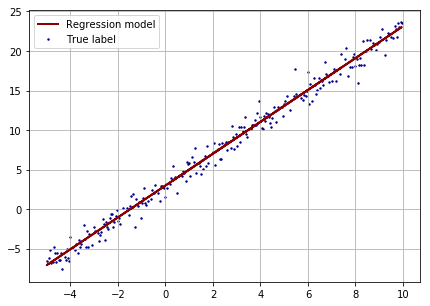

In [9]:
# visualization results
plt.figure(figsize=(7,5))
plt.scatter(x=X_train, y=Y_train, s=2, c='darkblue',label='True label')
plt.plot(X_train, Y_train_hat, c='darkred', linewidth=2, label='Regression model')
plt.legend()
plt.grid(True)

### 1.2 Multiple Linear Regression
with Boston Housing Dataset

In [10]:
# load the data
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [11]:
# see type of dataset
type(boston_dataset)

sklearn.utils.Bunch

In [12]:
# print the keys
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [13]:
# see each part
# Description
print(boston_dataset['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [14]:
# feature names
print(boston_dataset.feature_names)  # see the description for more information

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [15]:
# data and target
type(boston_dataset.data)

numpy.ndarray

In [16]:
boston_dataset.data.shape
# 506 rows and 13 columns

(506, 13)

In [17]:
boston_dataset.target.shape
# 506 items

(506,)

In [18]:
# view as dataframe
boston_df=pd.DataFrame(
    data=np.append(boston_dataset.data, boston_dataset.target.reshape(-1, 1), axis=1), 
    columns=np.append(boston_dataset.feature_names, ['PRICE'])
)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


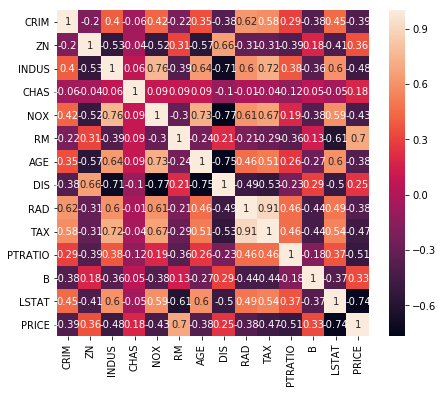

In [19]:
# we create a correlation matrix that measures the linear relationships between the variables.
correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(7,6))
sns.heatmap(data=correlation_matrix, annot=True, )

Text(0,0.5,'PRICE')

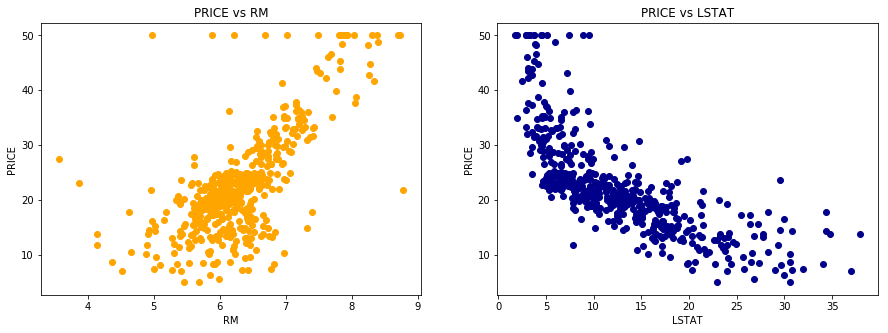

In [20]:
# sample plot data
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(boston_df.RM, boston_df.PRICE, c='orange')
plt.title('PRICE vs RM')
plt.xlabel('RM')
plt.ylabel('PRICE')

plt.subplot(1,2,2)
plt.scatter(boston_df.LSTAT, boston_df.PRICE, c='darkblue')
plt.title('PRICE vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')

In [21]:
# create train/test datasets
Xtrain, Xtest, Ytrain, Ytest = \
train_test_split(
    boston_dataset.data, boston_dataset.target.reshape(-1,1),
    test_size=0.2,
    random_state=5
)

In [22]:
# model object
lrModel = linear_model.LinearRegression()

In [23]:
# train model
lrModel.fit(X=Xtrain, y=Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# Model parameters
print('Model coefficients:', lrModel.coef_[0])
print('Model bias:', lrModel.intercept_[0])

Model coefficients: [-1.30297070e-01  4.93739220e-02  1.52699792e-03  2.70755661e+00
 -1.60074619e+01  3.40741645e+00  1.18339212e-03 -1.49381089e+00
  3.64266500e-01 -1.31647943e-02 -9.53457936e-01  1.18685182e-02
 -5.94883957e-01]
Model bias: 37.95642143555635


In [25]:
# get prediction
sample = Xtrain[0:1,:] # should be 2D array (number of samples, number of features)
prediction = lrModel.predict(sample)
print('Predicted value:', prediction.squeeze(), '\nTrue value:', Ytrain[0].squeeze())

Predicted value: 13.822318950419131 
True value: 13.1


### Model evaluation

In [26]:
print('MSE on train set:', mean_squared_error(Ytrain,lrModel.predict(Xtrain)))
print('MSE on test set:', mean_squared_error(Ytest,lrModel.predict(Xtest)))
print('RMSE on train set:', np.sqrt(mean_squared_error(Ytrain,lrModel.predict(Xtrain))/Ytrain.shape[0]))
print('RMSE on test set:', np.sqrt(mean_squared_error(Ytest,lrModel.predict(Xtest))/Ytest.shape[0]))

MSE on train set: 22.47540347897752
MSE on test set: 20.902843680372843
RMSE on train set: 0.2358647638566479
RMSE on test set: 0.45269177152192125


## 2. Logistic Regression
Don’t get confused by its name! It is **a classification not a regression** algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it **predicts the probability of occurrence of an event** by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

Again, let us try and understand this through a simple example.

*Let’s say your friend gives you a puzzle to solve. There are only 2 outcome scenarios – either you solve it or you don’t. Now imagine, that you are being given wide range of puzzles/quizzes in an attempt to understand which subjects you are good at. The outcome to this study would be something like this – if you are given a trignometry based tenth grade problem, you are 70% likely to solve it. On the other hand, if it is grade fifth history question, the probability of getting an answer is only 30%. This is what Logistic Regression provides you.*

Coming to the math, the log odds of the outcome is modeled as a linear combination of the predictor variables.

$$
\text{odds} = \frac{p}{1-p} = \frac{\text{probability of event occurrence}}{\text{probability of not event occurrence}}\\
\ln(\text{odds})=\ln\left(\frac{p}{1-p}\right)\\
\text{logit}(p)=\ln\left(\frac{p}{1-p}\right)=b_0+b_1x_1+b_2x_2+b_3x_3+....+b_kx_k
$$

Above, $p$ is the **probability of presence** of the characteristic of interest. It chooses parameters that **maximize the likelihood** of observing the sample values rather than that minimize the sum of squared errors (like in ordinary regression).

Now, you may ask, why take a log? For the sake of simplicity, let’s just say that this is one of the best mathematical way to replicate a step function. I can go in more details, but that will beat the purpose of this article.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Logistic_Regression.png)

**Below are sample code with breast cancer data set**

In [27]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [28]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [29]:
print(breast_cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [30]:
print('='*50)
print('Feature_name:', breast_cancer.feature_names)
print('='*50)
print('Target names:', breast_cancer.target_names)

Feature_name: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


In [31]:
# dataframe view
breast_cancer_df = pd.DataFrame(
    data=np.append(breast_cancer.data, breast_cancer.target.reshape(-1, 1), axis=1), 
    columns=np.append(breast_cancer.feature_names,['class'])
)
breast_cancer_df['class'] = breast_cancer_df['class']\
                             .map({0: breast_cancer.target_names[0], 1: breast_cancer.target_names[1]})
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,malignant
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,malignant
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,malignant
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,malignant
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,malignant
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,malignant
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,malignant
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,malignant
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,malignant
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,malignant


In [32]:
# split train/test
Xtrain, Xtest, Ytrain, Ytest = \
train_test_split(
    breast_cancer.data, breast_cancer.target,
    test_size = 0.3, 
    random_state=42
)

In [33]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(398, 30) (171, 30) (398,) (171,)


In [34]:
# Initialize and train model
lrClass = linear_model.LogisticRegression()
lrClass.fit(X=Xtrain, y=Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
# get prediction
sample = Xtrain[0:1,:]
prediction = lrClass.predict(sample)
print('Predicted label:\t', prediction.squeeze(),'--', breast_cancer.target_names[prediction.squeeze()])
print('True label:\t\t', Ytrain[0], '--', breast_cancer.target_names[Ytrain[0].squeeze()])

Predicted label:	 1 -- benign
True label:		 1 -- benign


### Model evaluation
#### Accuracy

In [36]:
train_acc = lrClass.score(X=Xtrain, y=Ytrain)
test_acc = lrClass.score(X=Xtest, y=Ytest)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 95.2 %
Accuracy on test set: 96.5 %


#### Confusion matrix
[_](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a) 

In [37]:
from sklearn.metrics import confusion_matrix

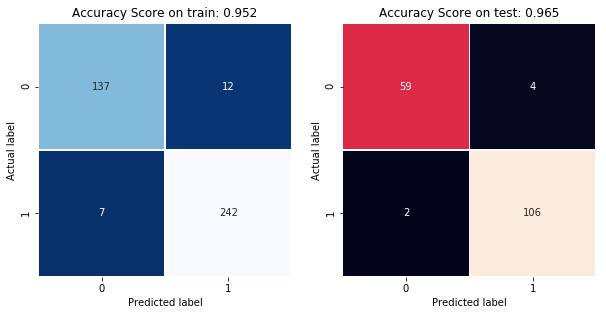

In [38]:
# get predictions 
Ytrain_pred = lrClass.predict(Xtrain)
Ytest_pred = lrClass.predict(Xtest)
# calculate confusion matrices
cm_train = confusion_matrix(y_true=Ytrain, y_pred=Ytrain_pred)
cm_test = confusion_matrix(y_true=Ytest, y_pred=Ytest_pred)
# visualization with seaborn
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='.0f', linewidths=.5, square = True, cmap = 'Blues_r', cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on train: %.3f'%(train_acc)
plt.title(all_sample_title, size = 12);

plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt='.0f', linewidths=.5, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on test: %.3f' % test_acc
plt.title(all_sample_title, size = 12);

#### Precision, recall, F-measure and support
[.](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

The **precision** is the ratio $\frac{tp}{tp + fp}$ where $tp$ is the number of true positives and $fp$ the number of false positives. *The precision is intuitively the ability of the classifier to* ***not label a sample as positive if it is negative***.

The **recall** is the ratio $\frac{tp}{tp + fn}$ where $tp$ is the number of true positives and $fn$ the number of false negatives. *The recall is intuitively the ability of the classifier to* ***find all the positive samples***.

The **F-beta score** can be interpreted as a **weighted harmonic mean of the precision and recall**, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score ($F_\beta$) weights the recall more than the precision by a factor of $\beta$, $\beta$ = 1.0 means recall and precision are equally important.

The **support** is the number of occurrences of each class in true label set.

In [39]:
from sklearn.metrics import classification_report

In [40]:
print('='*50, '\nOn train set:\n')
print(classification_report(Ytrain, Ytrain_pred))
print('='*50, '\nOn test set:\n')
print(classification_report(Ytest, Ytest_pred))

On train set:

             precision    recall  f1-score   support

          0       0.95      0.92      0.94       149
          1       0.95      0.97      0.96       249

avg / total       0.95      0.95      0.95       398

On test set:

             precision    recall  f1-score   support

          0       0.97      0.94      0.95        63
          1       0.96      0.98      0.97       108

avg / total       0.96      0.96      0.96       171



#### ROC Curve
The [receiver operating characteristic (ROC) curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

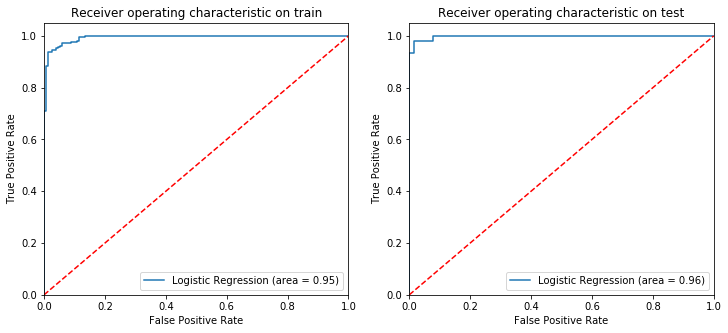

In [42]:
plt.figure(figsize=(12,5))
#train
plt.subplot(1,2,1)
logit_roc_auc = roc_auc_score(Ytrain, lrClass.predict(Xtrain))
fpr, tpr, thresholds = roc_curve(Ytrain, lrClass.predict_proba(Xtrain)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on train')
plt.legend(loc="lower right")
#test
plt.subplot(1,2,2)
logit_roc_auc = roc_auc_score(Ytest, lrClass.predict(Xtest))
fpr, tpr, thresholds = roc_curve(Ytest, lrClass.predict_proba(Xtest)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic on test')
plt.legend(loc="lower right")

## 3. Decision Tree
DT is a type of supervised learning algorithm that is mostly used for classification problems. Surprisingly, it **works for both categorical and continuous dependent** variables. In this algorithm, we **split the population into two or more homogeneous sets**. This is done based on most significant attributes/independent variables to make as distinct groups as possible.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/IkBzK.png)

In the image above, you can see that population is classified into four different groups based on multiple attributes to identify ‘if they will play or not’. To split the population into different heterogeneous groups, it uses various techniques like Gini, Information Gain, Chi-square, entropy.

The best way to understand how decision tree works, is to play Jezzball – a classic game from Microsoft (image below). Essentially, you have a room with moving walls and you need to create walls such that maximum area gets cleared off with out the balls.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/download.jpg)

So, every time you split the room with a wall, you are trying to create 2 different populations with in the same room. Decision trees work in very similar fashion by dividing a population in as different groups as possible.

More: [Simplified Version of Decision Tree Algorithms](https://www.analyticsvidhya.com/blog/2015/01/decision-tree-simplified/)

**Code with Iris dataset**

In [43]:
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()

In [45]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [46]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [47]:
# dataframe view
iris_df = pd.DataFrame(
    data=np.append(iris.data, iris.target.reshape(-1, 1), axis=1), 
    columns=np.append(iris.feature_names,['class'])
)
iris_df['class'] = iris_df['class']\
                             .map({
                                    0: iris.target_names[0], 
                                    1: iris.target_names[1],
                                    2: iris.target_names[2]
                                  })
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [48]:
from sklearn import tree

In [49]:
# Initialize and train model
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data, iris.target)

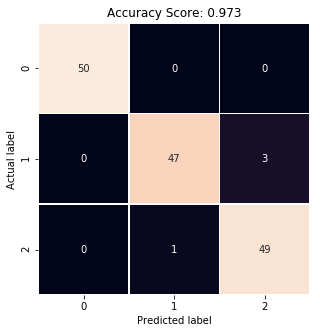

In [50]:
# calculate confusion matrices
prediction = clf.predict(iris.data)
cm = confusion_matrix(y_true=iris.target, y_pred=prediction)
acc = clf.score(X=iris.data, y=iris.target)
# visualization with seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=.5, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.3f'%(acc)
plt.title(all_sample_title, size = 12);

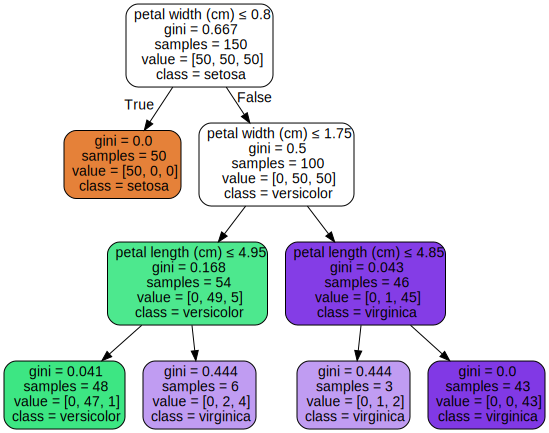

In [51]:
# tree visualization
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

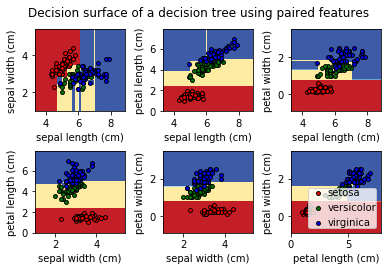

In [52]:
# Optional 
# Plot the decision surface of a decision tree on the iris dataset

# Parameters
n_classes = 3
plot_colors = "rgb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

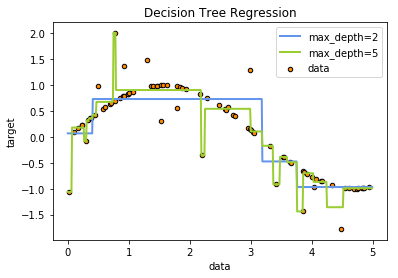

In [53]:
# Optional: Regression Decission Tree
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
# print(__doc__)

# Create a random dataset
rng = np.random.RandomState(42)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

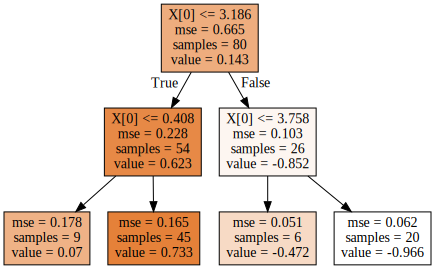

In [54]:
dot_data = tree.export_graphviz(
    decision_tree=regr_1, 
    out_file=None, 
    filled=True
)  
graphviz.Source(dot_data)


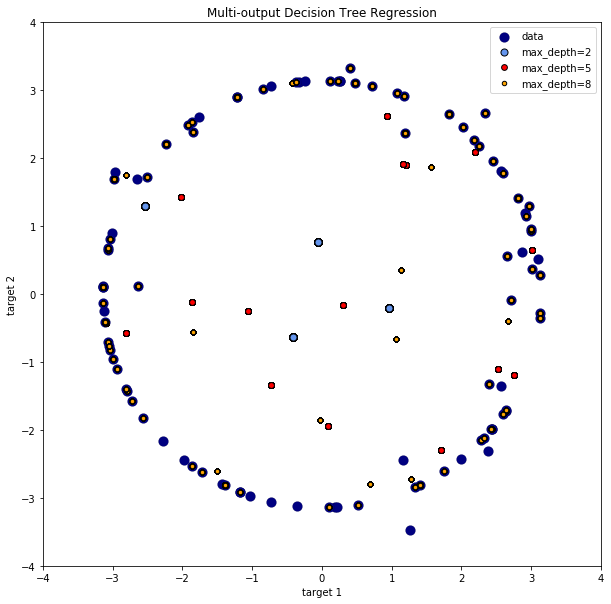

In [55]:
# Optional
# Multi-output Decision Tree Regression
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_3 = tree.DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure(figsize=(10,10))
s = 100
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data", linewidths=0.1)
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s/2, edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s/3, edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s/5, edgecolor="black", label="max_depth=8")
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

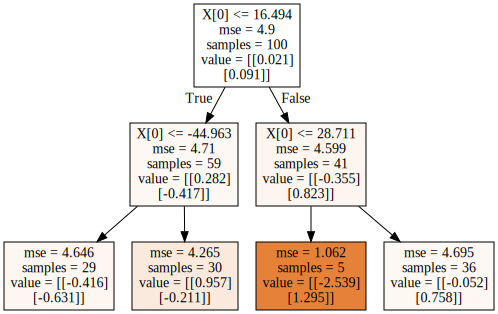

In [56]:
dot_data = tree.export_graphviz(
    decision_tree=regr_1, 
    out_file=None, 
    filled=True
)  
graphviz.Source(dot_data)

In [57]:
print(tree.export_graphviz(
    decision_tree=regr_3, 
    out_file=None, 
    filled=True,
    node_ids=True
))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="node #0\nX[0] <= 16.494\nmse = 4.9\nsamples = 100\nvalue = [[0.021]\n[0.091]]", fillcolor="#e5813900"] ;
1 [label="node #1\nX[0] <= -44.963\nmse = 4.71\nsamples = 59\nvalue = [[0.282]\n[-0.417]]", fillcolor="#e581390a"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="node #2\nX[0] <= -97.884\nmse = 4.646\nsamples = 29\nvalue = [[-0.416]\n[-0.631]]", fillcolor="#e581390d"] ;
1 -> 2 ;
3 [label="node #3\nX[0] <= -99.702\nmse = 0.311\nsamples = 2\nvalue = [[2.316]\n[2.028]]", fillcolor="#e58139ef"] ;
2 -> 3 ;
4 [label="node #4\nmse = 0.0\nsamples = 1\nvalue = [[1.826]\n[2.645]]", fillcolor="#e58139ff"] ;
3 -> 4 ;
5 [label="node #5\nmse = 0.0\nsamples = 1\nvalue = [[2.807]\n[1.411]]", fillcolor="#e58139ff"] ;
3 -> 5 ;
6 [label="node #6\nX[0] <= -80.931\nmse = 4.389\nsamples = 27\nvalue = [[-0.619]\n[-0.828]]", fillcolor="#e581391b"] ;
2 -> 6 ;
7 [label="node #7\nX[0] <= -82.262\nmse = 3.501\

## 4. SVM (Support Vector Machine)

It is a **classification** method. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

For example, if we only had two features like Height and Hair length of an individual, we’d first plot these two variables in two dimensional space where each point has two co-ordinates (these co-ordinates are known as Support Vectors)

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/SVM1.png)

Now, we will **find some line that splits the data** between the two differently classified groups of data. This will be the line such that the **distances from the closest point** in **each of the two groups will be farthest away.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/SVM2.png)

In the example shown above, the line which splits the data into two differently classified groups is the black line, since the two closest points are the farthest apart from the line. This line is our classifier. Then, depending on where the testing data lands on either side of the line, that’s what class we can classify the new data as.

More: [Simplified Version of Support Vector Machine](https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/)

Think of this algorithm as playing JezzBall in n-dimensional space. The tweaks in the game are:

    You can draw lines / planes at any angles (rather than just horizontal or vertical as in classic game)
    The objective of the game is to segregate balls of different colors in different rooms.
    And the balls are not moving.

In [58]:
# simple example
# data
X = np.array([[1,2], [4,7], [1.5,1.8], [5,6], [1,0.6], [5.5,8], [2,3], [4,6]])
# label
y = np.array([0,1,0,1,0,1,0,1])

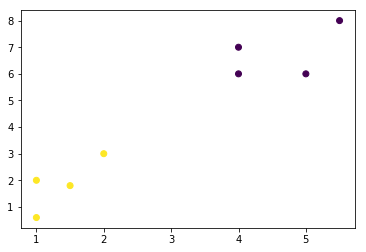

In [59]:
# data visualization
plt.scatter(X[:, 0], X[:, 1], c = 1-y)

In [60]:
from sklearn import svm
# train model 
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
# predition
print(clf.predict(X))

[0 1 0 1 0 1 0 1]


In [62]:
# prediction function
clf.decision_function(X) 

array([-1.76923077,  1.46153846, -1.70769231,  1.30769231, -2.41538462,
        2.38461538, -1.        ,  1.        ])

In [63]:
(clf.decision_function(X) > 0).astype('int')

array([0, 1, 0, 1, 0, 1, 0, 1])

In [64]:
# get support vectors
clf.support_vectors_

array([[2., 3.],
       [4., 6.]])

In [65]:
# get indices of support vectors
clf.support_

array([6, 7], dtype=int32)

In [66]:
# get number of support vectors for each class
clf.n_support_ 

array([1, 1], dtype=int32)

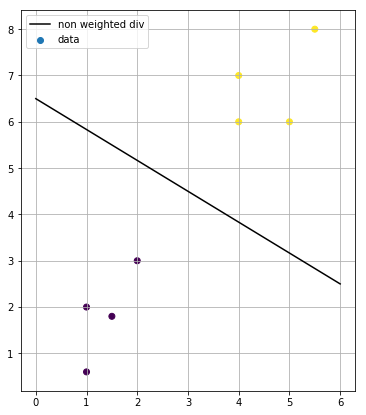

In [67]:
# data with decision boundary
w = clf.coef_[0]
k = -w[0] / w[1]
xx = np.linspace(0,6)
yy = k * xx - clf.intercept_[0] / w[1]
plt.figure(figsize=(6,7))
plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c = y, label='data')
plt.legend(), plt.grid(True)
plt.show()

In [68]:
# SVM with scikit learn and iris data set
# Initialise and train model
C = 1.0
svm_model = svm.SVC(kernel='linear', C=C)
svm_model.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

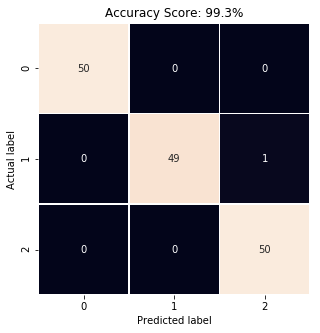

In [69]:
# calculate confusion matrices
prediction = svm_model.predict(iris.data)
cm = confusion_matrix(y_true=iris.target, y_pred=prediction)
acc = svm_model.score(X=iris.data, y=iris.target)
# visualization with seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=.5, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.1f'%(acc*100) + '%'
plt.title(all_sample_title, size = 12);

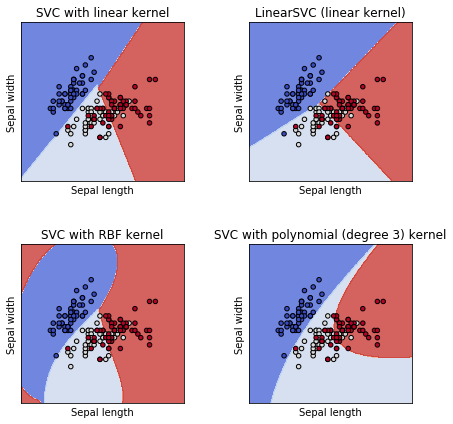

In [70]:
# Optional 
# Plot different SVM classifiers in the iris dataset
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(7,7))
# plt.
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


## 5. Naive Bayes
It is a **classification technique** based on **Bayes’ theorem** with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple.

Naive Bayesian model is **easy to build** and particularly **useful** for **very large data sets**. Along with simplicity, Naive Bayes is known to **outperform even highly sophisticated classification methods**.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Bayes_rule.png)

Here,

- $P(c|x)$ is the posterior probability of class (target) given predictor (attribute). 
- $P(c)$ is the prior probability of class. 
- $P(x|c)$ is the likelihood which is the probability of predictor given class. 
- $P(x)$ is the prior probability of predictor.

Example: Let’s understand it using an example. Below I have a training data set of weather and corresponding target variable ‘Play’. Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.

- *Step 1*: Convert the data set to frequency table
- *Step 2*: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.
![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Bayes_41-850x310.png)
- *Step 3*: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

Problem: Players will pay if weather is sunny, is this statement is correct?<br>
We can solve it using above discussed method, so P(Yes|Sunny) = P(Sunny|Yes) * P(Yes)/P(Sunny)<br>
Here we have P(Sunny|Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P(Yes)= 9/14 = 0.64<br>
Now, P(Yes|Sunny) = 0.33* 0.64/0.36 = 0.60, which has higher probability.

Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification and with problems having multiple classes.
[From scratch](https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/)

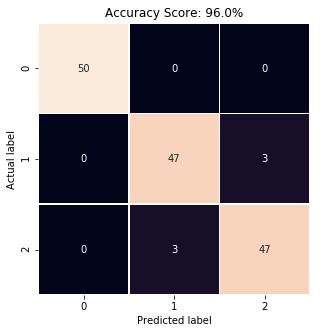

In [71]:
# with sklearn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(iris.data, iris.target)
# calculate confusion matrices
prediction = gnb.predict(iris.data)
cm = confusion_matrix(y_true=iris.target, y_pred=prediction)
acc = gnb.score(X=iris.data, y=iris.target)
# visualization with seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=.5, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.1f'%(acc*100) + '%'
plt.title(all_sample_title, size = 12);

In [72]:
# summaries
print('Number of feature:', iris.data.shape[1])
print('Probability of each class:\n', gnb.class_prior_)
print('Number of training samples observed in each class:\n', gnb.class_count_)
print('Mean of each feature per class:\n', gnb.theta_)
print('Variance of each feature per class:\n', gnb.sigma_)

Number of feature: 4
Probability of each class:
 [0.33333333 0.33333333 0.33333333]
Number of training samples observed in each class:
 [50. 50. 50.]
Mean of each feature per class:
 [[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
Variance of each feature per class:
 [[0.121764 0.142276 0.029504 0.011264]
 [0.261104 0.0965   0.2164   0.038324]
 [0.396256 0.101924 0.298496 0.073924]]


In [73]:
# optional
# how to get predictiton
def gaussian(x, mu, sig):
    """
    return gaussian probability of value x with mean mu and standard deviation sig
    """
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

Xtest = iris.data[[0, 60, 140]]
numclass = 3  # number of classes
numfeat = 4   # number of feature
mu = gnb.theta_
sig = gnb.sigma_
pclass = gnb.class_prior_
# feature shape = (3,4)
# get probability each feature per class, shape = (number of sample, number of classes, number of feature)
prob_xij_ck = \
gaussian(np.tile(Xtest, (1,1,numclass)).reshape(Xtest.shape[0],numclass,numfeat), mu, sig)
# get probability each sample per class, shape = (number of sample, number of classes)
prob_xi_ck = np.multiply.reduce(prob_xij_ck,2)
# get prediction
prediction = (prob_xi_ck*pclass).argmax(axis=1)
print("Bayes prediction:\n", prediction)
print("Prediction by Sklearn:\n", gnb.predict(Xtest))


Bayes prediction:
 [0 1 2]
Prediction by Sklearn:
 [0 1 2]


**Gaussian Naive Bayesian** to train for Feature X (shape = number of samples $M$, number of features $N$), label y (shape = $(M, 1)$)
- Training:
    - Group by class (total number - $K$), calculate prior (based on frequency) of each class - $p(c_k)$
    - Supose in each class each feature has gaussian distribution
    - Estimate mean $\mu_{k,n}$ and standard deviation $\sigma_{k,n}$ of each feature for each class
- Prediction:
    - Calculate probability $p(x_{m,n}|c_k) = \text{Gaussian}(x_{m,n}, \mu_{k,n}, \sigma_{k,n})$
    - Supose features are independent, calculate likelihood $p(X_m|c_k) = \prod_{n}{p(x_{m,n}|c_k)}$
    - Calculate posterior (or probability each sample belong to each class) $p(c_k|X_m) = \frac{p(X_m|c_k)p(c_k)}{p(X_m)}$ 
    - Return class with largest posterior $p(c_k|X_m)$

## 6. kNN (k- Nearest Neighbors)
It can be used for **both classification and regression** problems. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that **stores all available cases** and **classifies** new cases **by a majority vote** of its k neighbors. The case being assigned to the class is **most common** amongst its **K nearest neighbors** measured by a **distance** function.

These distance functions can be Euclidean, Manhattan, Minkowski and Hamming distance. First three functions are used for continuous function and fourth one (Hamming) for categorical variables. If K = 1, then the case is simply assigned to the class of its nearest neighbor. At times, ***choosing K*** *turns out to be a **challenge** while performing kNN modeling*.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/KNN.png)

KNN can easily be mapped to our real lives. If you want to **learn about a person**, of whom you have no information, you might like to **find out about his close friends** and the circles he moves in and gain access to his/her information!

Things to consider before selecting kNN:

- KNN is computationally expensive
- Variables should be normalized else higher range variables can bias it
- Works on pre-processing stage more before going for kNN like outlier, noise removal

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# simple code with sklearn and simple dataset
X = np.array([[1,2], [4,7], [1.5,1.8], [5,6], [1,0.6], [5.5,8], [2,3], [4,6]])
y = np.array([0,1,0,1,0,1,0,1])
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

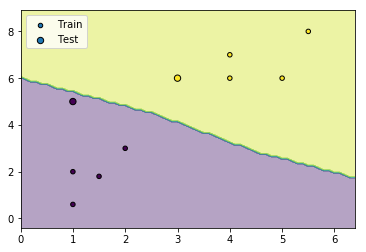

In [76]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', label='Train')

Xtest = np.array([[1,5], [3,6]])
Ytest = neigh.predict(Xtest)

plt.scatter(Xtest[:, 0], Xtest[:, 1], c=Ytest, s=40, edgecolor='k', label='Test')
plt.legend()

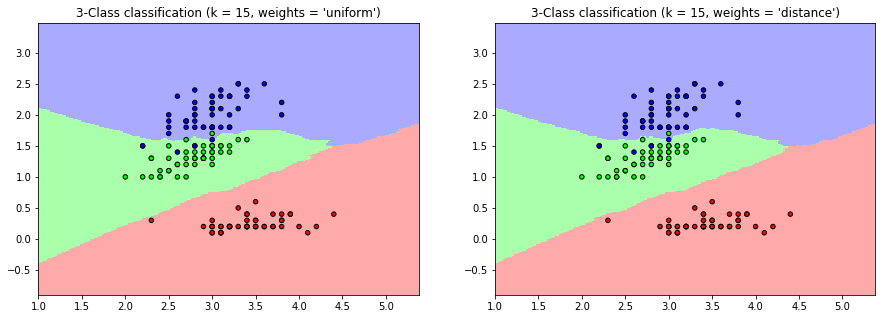

In [77]:
# with iris dataset
from matplotlib.colors import ListedColormap
n_neighbors = 15
# import some data to play with
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, [1,3]]
y = iris.target
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
ww = ['uniform', 'distance'] 
plt.figure(figsize=(15,5))

for i in [0, 1]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=ww[i])
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,i+1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.axis([xx.min(), xx.max(), yy.min(), yy.max()])
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, ww[i]))

plt.show()

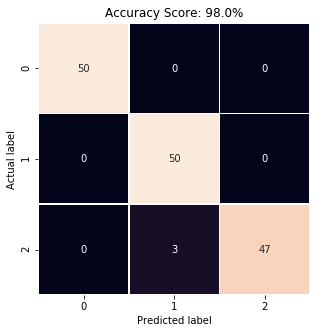

In [78]:
clf = KNeighborsClassifier(n_neighbors=15,  weights='distance')
clf.fit(X=iris.data[:, [1,3]], y=iris.target)
prediction = clf.predict(iris.data[:, [1,3]])
# calculate confusion matrices
cm = confusion_matrix(y_true=iris.target, y_pred=prediction)
acc = clf.score(X=iris.data[:, [1,3]], y=iris.target)
# visualization with seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=.5, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.1f'%(acc*100) + '%'
plt.title(all_sample_title, size = 12);

## 7. K-Means
It is a type of **unsupervised algorithm** which  solves the clustering problem. Its procedure follows a simple and easy  way to classify a given data set through a certain number of  clusters (assume k clusters). Data points inside a cluster are homogeneous and heterogeneous to peer groups.

Remember figuring out shapes from ink blots? k means is somewhat similar this activity. You look at the shape and spread to decipher how many different clusters / population are present!

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/splatter_ink_blot_texture_by_maki_tak-d5p6zph.jpg)

**How K-means forms cluster**:

- K-means picks k number of points for each cluster known as centroids.
- Each data point forms a cluster with the closest centroids i.e. k clusters.
- Finds the centroid of each cluster based on existing cluster members. Here we have new centroids.
- As we have new centroids, repeat step 2 and 3. Find the closest distance for each data point from new centroids and get associated with new k-clusters. Repeat this process until convergence occurs i.e. centroids does not change.

**How to determine value of K**:

In K-means, we have clusters and each cluster has its own centroid. Sum of square of difference between centroid and the data points within a cluster constitutes within sum of square value for that cluster. Also, when the sum of square values for all the clusters are added, it becomes total within sum of square value for the cluster solution.

We know that as the number of cluster increases, this value keeps on decreasing but if you plot the result you may see that the sum of squared distance decreases sharply up to some value of k, and then much more slowly after that. Here, we can find the optimum number of cluster.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Kmenas-850x429.png)

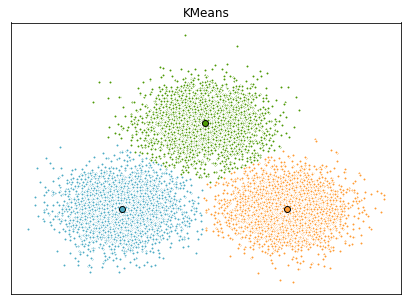

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
np.random.seed(42)
centers = [[-2, 0], [2, 0], [0, 3]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=10000, centers=centers, cluster_std=0.7)

# #############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)

# Plot result
plt.figure(figsize=(7, 5))
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w', 
             markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', 
             markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.title('KMeans')
plt.xticks(())
plt.yticks(())

plt.show()

## 8. Random Forest
Random Forest is a trademark term for **an ensemble of decision trees**. In Random Forest, we’ve collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

Each tree is planted & grown as follows:

1. If the number of cases in the training set is N, then sample of N cases is taken at random but with replacement. This sample will be the training set for growing the tree.
2. If there are M input variables, a number m<<M is specified such that at each node, m variables are selected at random out of the M and the best split on these m is used to split the node. The value of m is held constant during the forest growing.
3. Each tree is grown to the largest extent possible. There is no pruning.

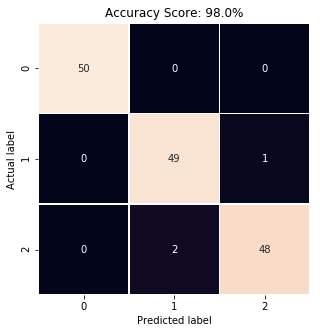

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42)
rf_clf.fit(iris.data, iris.target)

prediction = rf_clf.predict(iris.data)
# calculate confusion matrices
cm = confusion_matrix(y_true=iris.target, y_pred=prediction)
acc = rf_clf.score(X=iris.data, y=iris.target)
# visualization with seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=.5, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.1f'%(acc*100) + '%'
plt.title(all_sample_title, size = 12);

In [81]:
rf_clf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1608637542, splitter='best')

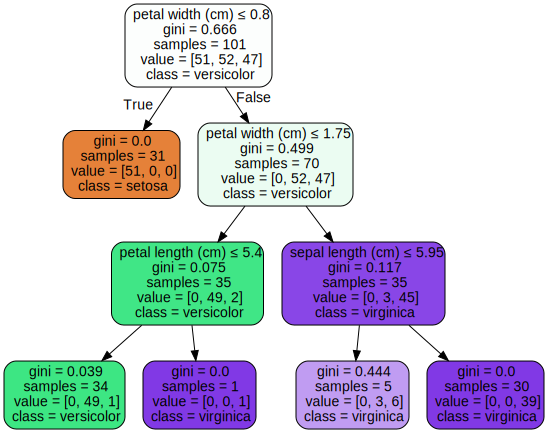

In [82]:
dot_data = tree.export_graphviz(rf_clf.estimators_[0], out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

## 9. Dimensionality Reduction Algorithms

In the last 4-5 years, there has been an exponential increase in data capturing at every possible stages. Corporates/ Government Agencies/ Research organisations are not only coming with new sources but also they are capturing data in great detail.

For example: E-commerce companies are capturing more details about customer like their demographics, web crawling history, what they like or dislike, purchase history, feedback and many others to give them personalized attention more than your nearest grocery shopkeeper.

As a data scientist, the data we are offered also consist of many features, this sounds good for building good robust model but there is a challenge. How’d you identify highly significant variable(s) out 1000 or 2000? In such cases, dimensionality reduction algorithm helps us along with various other algorithms like Decision Tree, Random Forest, PCA, Factor Analysis, Identify based on correlation matrix, missing value ratio and others.

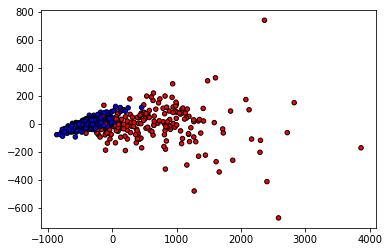

In [83]:
# code with PCA nad iris data
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(breast_cancer.data)

plt.scatter(X[:, 0], X[:, 1], c=breast_cancer.target, cmap=cmap_bold,edgecolor='k', s=20)

## 10. Gradient Boosting Algorithms

### 10.1. GBM

GBM is a boosting algorithm used when we **deal with plenty of data** to make a prediction with high prediction power. Boosting is actually an **ensemble of learning algorithms** which combines the prediction of several base estimators in order to improve robustness over a single estimator. It combines multiple weak or average predictors to a build strong predictor. These boosting algorithms always work well in data science competitions like Kaggle, AV Hackathon, CrowdAnalytix.

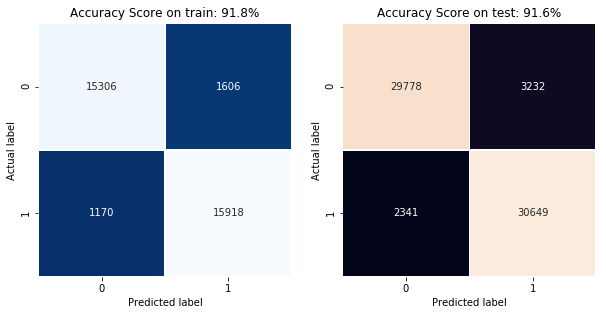

In [84]:
# sample code
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

# generate data for classification
X, y = make_classification(n_samples=100000, n_features=50, n_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66)
grd = GradientBoostingClassifier(n_estimators=10)

grd.fit(X_train, y_train)
y_train_pred = grd.predict(X_train)
y_test_pred = grd.predict(X_test)

train_acc = grd.score(X=X_train, y=y_train)
test_acc = grd.score(X=X_test, y=y_test)

# calculate confusion matrices
cm_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
cm_test = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
# visualization with seaborn
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='.0f', linewidths=.5, square = True, cmap = 'Blues_r', cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on train: %.1f'%(train_acc*100) + '%'
plt.title(all_sample_title, size = 12);

plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt='.0f', linewidths=.5, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on test: %.1f' % (test_acc*100) + '%'
plt.title(all_sample_title, size = 12);

In [85]:
print('='*50, '\nOn train set:\n')
print(classification_report(y_train, y_train_pred))
print('='*50, '\nOn test set:\n')
print(classification_report(y_test, y_test_pred))

On train set:

             precision    recall  f1-score   support

          0       0.93      0.91      0.92     16912
          1       0.91      0.93      0.92     17088

avg / total       0.92      0.92      0.92     34000

On test set:

             precision    recall  f1-score   support

          0       0.93      0.90      0.91     33010
          1       0.90      0.93      0.92     32990

avg / total       0.92      0.92      0.92     66000



### 10.2. XGBoost

Another classic gradient boosting algorithm that’s known to be the decisive choice between winning and losing in some Kaggle competitions.

The XGBoost has an immensely high predictive power which makes it the best choice for accuracy in events as it possesses both linear model and the tree learning algorithm, making the algorithm almost 10x faster than existing gradient booster techniques.

The support includes various objective functions, including regression, classification and ranking.

One of the most interesting things about the XGBoost is that it is also called a regularized boosting technique. This helps to reduce overfit modelling and has a massive support for a range of languages such as Scala, Java, R, Python, Julia and C++.

Supports distributed and widespread training on many machines that encompass GCE, AWS, Azure and Yarn clusters. XGBoost can also be integrated with Spark, Flink and other cloud dataflow systems with a built in cross validation at each iteration of the boosting process.

### 10.3. LightGBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency
- Lower memory usage
- Better accuracy
- Parallel and GPU learning supported
- Capable of handling large-scale data

The framework is a fast and high-performance gradient boosting one based on decision tree algorithms, used for ranking, classification and many other machine learning tasks. It was developed under the Distributed Machine Learning Toolkit Project of Microsoft.

Since the LightGBM is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms.

Also, it is surprisingly very fast, hence the word ‘Light’.